# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [593]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
from sklearn.datasets import load_digits
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import BayesianRidge, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from time import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC

In [594]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [595]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [596]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [597]:
df.shape

(41188, 21)

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [598]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x156905040>,
      dtype=object)

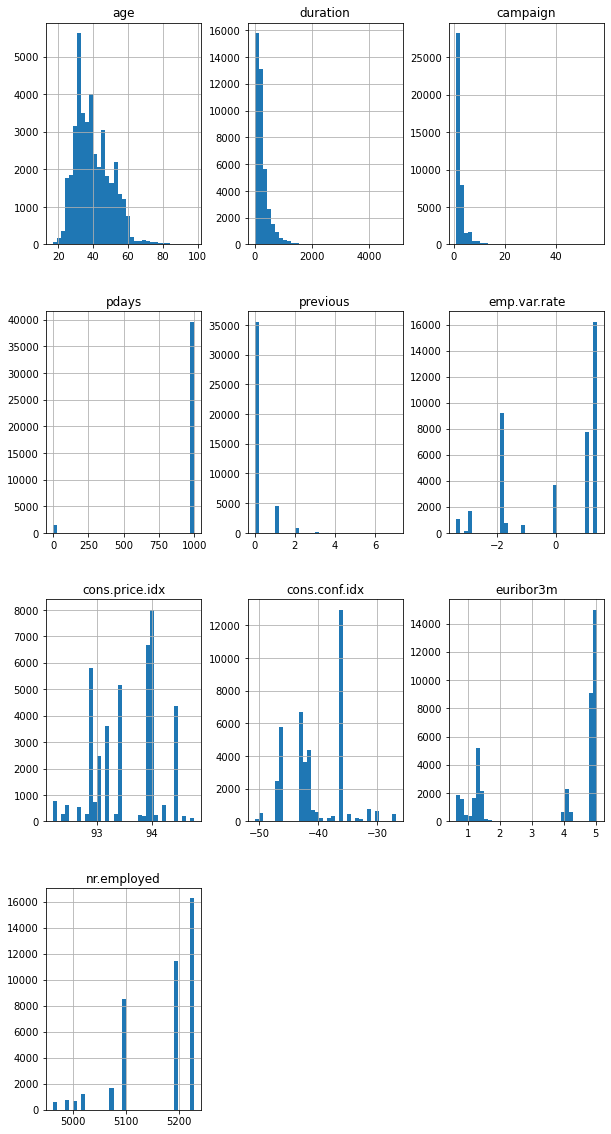

In [599]:
df.hist(bins=35,figsize=(10,20))

In [600]:
# create Correlation Matrix to understand the correlation between numeric columns
df.corr()

<ipython-input-600-078958d9e474>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


<ipython-input-601-21f4ecc2ce54>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


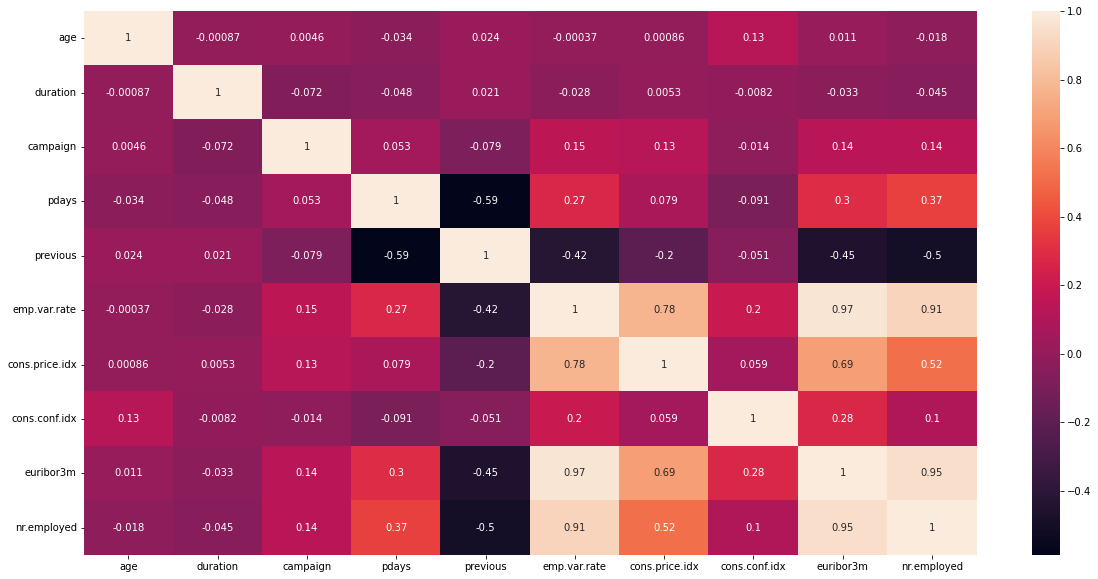

In [601]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

In [602]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [603]:
num_col = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx','euribor3', 'nr.epmployed']
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month', 'day_of_week', 'poutcome', 'y']

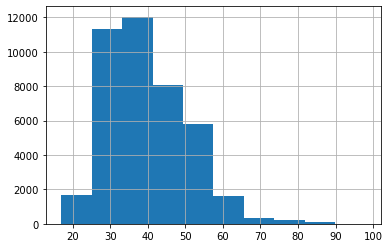

In [604]:
df["age"].hist(bins=10)

In [605]:
print(df["age"].max())
print(df["age"].min())

98
17


In [606]:
bank_df = df.copy()

In [607]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [608]:
bank_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [609]:
# Removing the outliers
first_quartile = df['age'].quantile(.25)
third_quartile = df['age'].quantile(.75)
iqr = third_quartile - first_quartile
lower_quartile = first_quartile - 1.5 *iqr
upper_quartile = third_quartile + 1.5 * iqr
bank_df = df.loc[(df['age']> lower_quartile) & (df['age']<upper_quartile)]

In [610]:
print(bank_df["age"].max())
print(bank_df["age"].min())

69
17


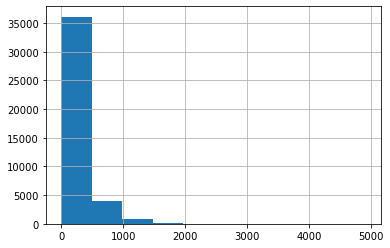

In [611]:
df["duration"].hist(bins=10)

In [612]:
# Removing outliers from duration
print(bank_df["duration"].max())
print(bank_df["duration"].min())
first_quartile = bank_df['duration'].quantile(.25)
third_quartile = bank_df['duration'].quantile(.75)
iqr = third_quartile - first_quartile
lower_quartile = first_quartile - 1.5 * iqr
upper_quartile = third_quartile + 1.5 * iqr
bank_df = df.loc[(df['duration']> lower_quartile) & (df['duration']< upper_quartile)]

4918
0


644
0


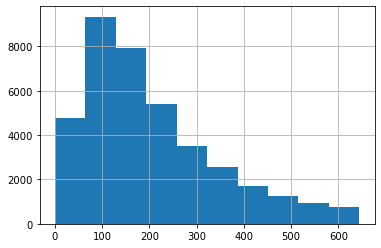

In [613]:
bank_df["duration"].hist(bins=10)
print(bank_df["duration"].max())
print(bank_df["duration"].min())

In [614]:
print(bank_df["campaign"].max())
print(bank_df["campaign"].min())

56
1


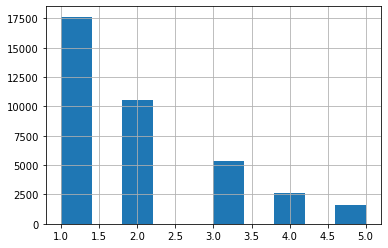

In [615]:
# Remove outliers from the numerical column - campaign using IQR
first_quartile = bank_df['campaign'].quantile(.25)
third_quartile = bank_df['campaign'].quantile(.75)
iqr = third_quartile - first_quartile
lower_quartile = first_quartile - 1.5 * iqr
upper_quartile = third_quartile + 1.5 * iqr
bank_df = df.loc[(df['campaign']> lower_quartile) & (df['campaign']< upper_quartile)]
bank_df["campaign"].hist(bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x160b63f40>,
      dtype=object)

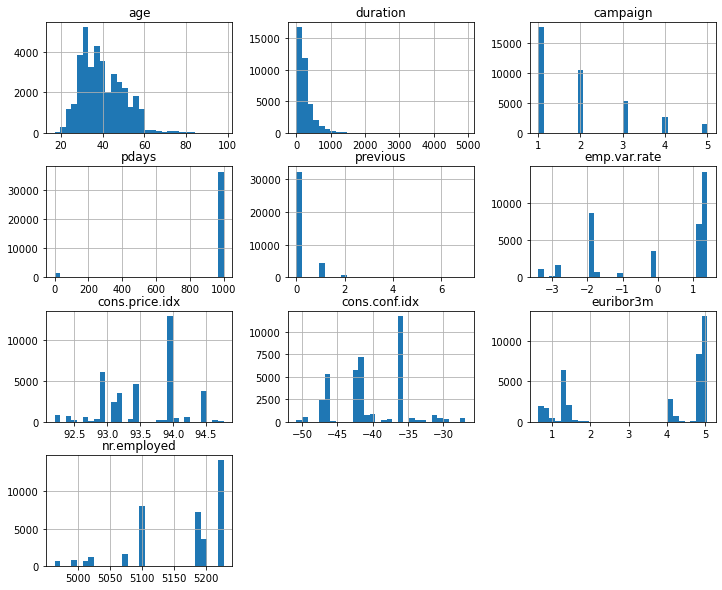

In [616]:
bank_df.hist(bins=30, figsize=(12, 10))

Text(0.5, 1.0, 'Campaign Acceptance Rate based on Number of Contacts Performed')

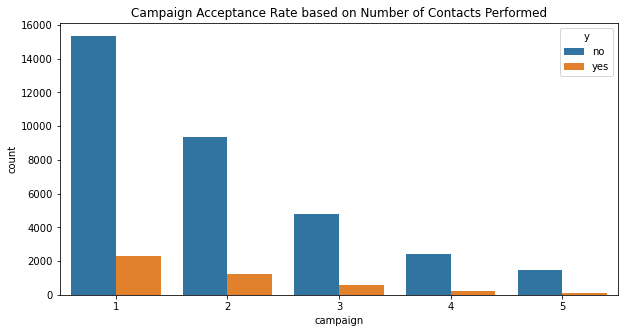

In [617]:
# Campaign Acceptance rate based of Number of contact performed
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(data=bank_df, x='campaign', hue='y')
plt.title("Campaign Acceptance Rate based on Number of Contacts Performed")

Text(0.5, 1.0, 'Campaign Acceptance Rate based on Number of Contacts Performed')

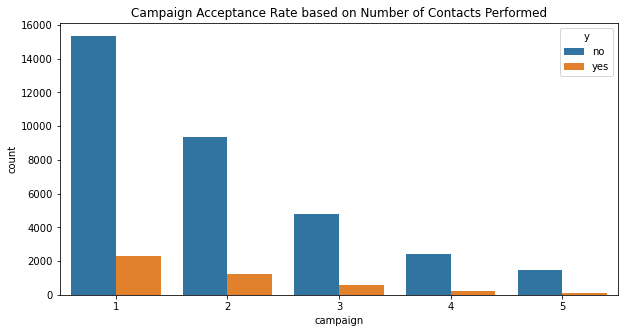

In [618]:
# Campaign Acceptance rate based of Number of contact performed
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(data=bank_df, x='campaign', hue='y')
plt.title("Campaign Acceptance Rate based on Number of Contacts Performed")

Text(0.5, 1.0, 'Campaign Acceptance Rate based on Jobs Performed')

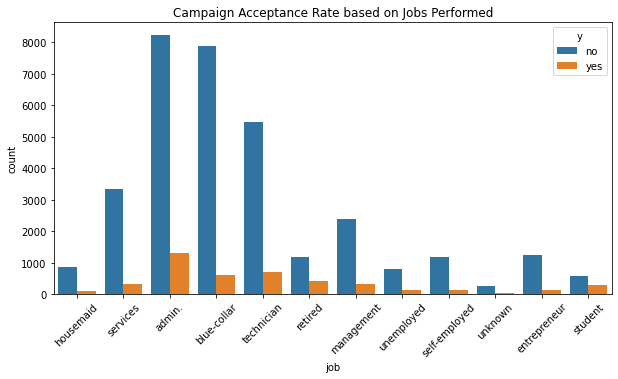

In [619]:
# Campaign Acceptance rate based of jobs
fig, ax = plt.subplots(figsize=(10,5))
plt.setp(plt.xticks()[1], rotation=45)
sns.countplot(data=bank_df, x='job', hue='y')
plt.title("Campaign Acceptance Rate based on Jobs Performed")

Text(0.5, 1.0, 'Campaign Acceptance Rate based on Number of Marital Status')

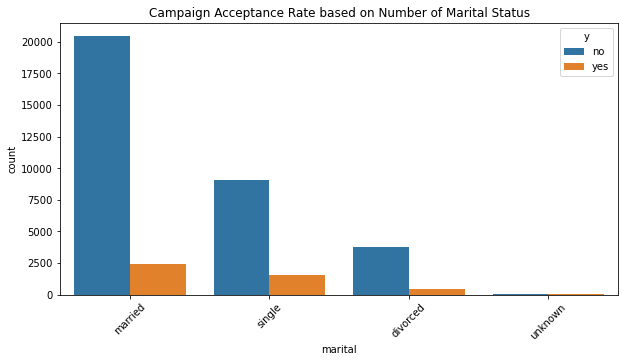

In [620]:
# Campaign Acceptance rate based of Marital Status
fig, ax = plt.subplots(figsize=(10,5))
plt.setp(plt.xticks()[1], rotation=45)
sns.countplot(data=bank_df, x='marital', hue='y')
plt.title("Campaign Acceptance Rate based on Number of Marital Status")

Text(0.5, 1.0, 'Campaign Acceptance Rate based on Education')

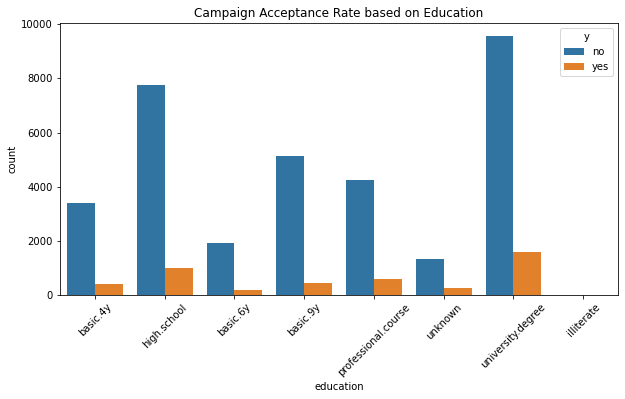

In [621]:
# Campaign Acceptance rate based of Education
fig, ax = plt.subplots(figsize=(10,5))
plt.setp(plt.xticks()[1], rotation=45)
sns.countplot(data=bank_df, x='education', hue='y')
plt.title("Campaign Acceptance Rate based on Education")

Text(0.5, 1.0, 'Campaign Acceptance Rate based on loan')

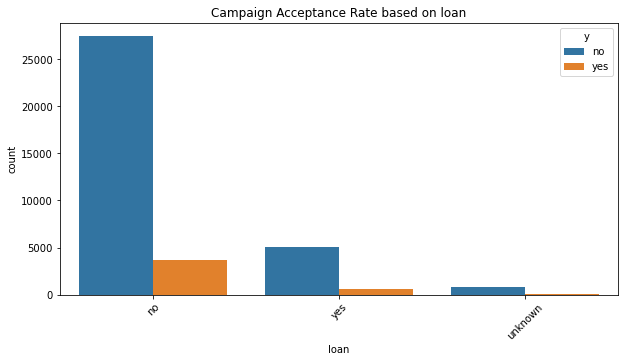

In [622]:
# Campaign Acceptance rate based of Education
fig, ax = plt.subplots(figsize=(10,5))
plt.setp(plt.xticks()[1], rotation=45)
sns.countplot(data=bank_df, x='loan', hue='y')
plt.title("Campaign Acceptance Rate based on loan")

Text(0.5, 1.0, 'Campaign Acceptance Rate based on outcome')

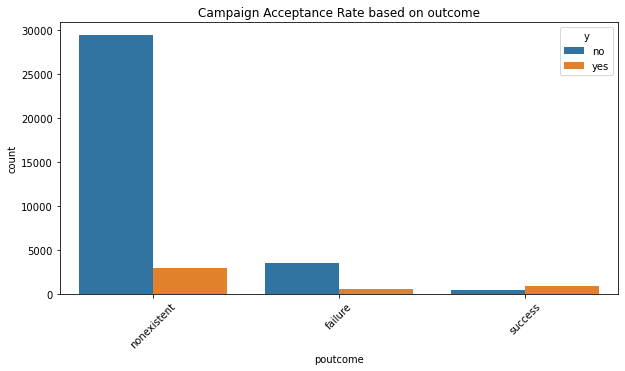

In [623]:
# Campaign Acceptance rate based of Education
fig, ax = plt.subplots(figsize=(10,5))
plt.setp(plt.xticks()[1], rotation=45)
sns.countplot(data=bank_df, x='poutcome', hue='y')
plt.title("Campaign Acceptance Rate based on outcome")

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [624]:
#Converting Categorical Columns to Numerical Columns using Target Encoder
encoder = preprocessing.LabelEncoder()
encoder_df = bank_df.copy()
def target_encoder(data):
    impute_ordinal = encoder.fit_transform(data)
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

for i in tqdm(range(len(cat_cols))):
    target_encoder(encoder_df[cat_cols[i]])

  0%|          | 0/11 [00:00<?, ?it/s]<ipython-input-624-a6fc6193fbfe>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data.notnull()] = np.squeeze(impute_ordinal)
100%|██████████| 11/11 [00:00<00:00, 132.75it/s]


In [625]:
encoder_df.describe()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,37803.000000,37803.000000,37803.000000,37803.000000,37803.000000,37803.000000,37803.000000,37803.000000,37803.000000,37803.000000
mean,40.007142,263.432717,1.941751,960.176653,0.181785,0.028646,93.560179,-40.485398,3.569125,5164.639314
std,10.458787,259.254134,1.125077,192.472059,0.506630,1.583386,0.581213,4.693541,1.748335,73.031312
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,107.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,185.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,47.000000,324.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,5.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [626]:
encoder_df = encoder_df.drop('duration', axis=1) 


In [627]:
encoder_df.reset_index()

,index,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,3,1,0,0,0,0,1,6,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,1,57,7,1,3,1,0,0,1,6,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,2,37,7,1,3,0,2,0,1,6,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,3,40,0,1,1,0,0,0,1,6,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,4,56,7,1,3,0,0,2,1,6,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37798,41183,73,5,1,5,0,2,0,0,7,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
37799,41184,46,1,1,5,0,0,0,0,7,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
37800,41185,56,5,1,6,0,2,0,0,7,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
37801,41186,44,9,1,5,0,0,0,0,7,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [628]:
#standardizing the dataset
scaler = preprocessing.StandardScaler()
std_df = scaler.fit_transform(encoder_df.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month', 'day_of_week','campaign', 'previous', 'poutcome', 'emp.var.rate','y'], axis=1))
scaled_df = pd.DataFrame(std_df, columns=['age','pdays','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'])


In [629]:
scaled_df = pd.DataFrame(std_df, columns=['age','pdays','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'])


In [630]:
scaled_df['job'] = encoder_df['job'].values
scaled_df['marital'] = encoder_df['marital'].values
scaled_df['education'] = encoder_df['education'].values
scaled_df['default'] = encoder_df['default'].values
scaled_df['housing'] = encoder_df['housing'].values
scaled_df['loan'] = encoder_df['loan'].values
scaled_df['contact'] = encoder_df['contact'].values
scaled_df['month'] = encoder_df['month'].values
scaled_df['day_of_week'] = encoder_df['day_of_week'].values
scaled_df['campaign'] = encoder_df['campaign'].values
scaled_df['previous'] = encoder_df['previous'].values
scaled_df['poutcome'] = encoder_df['poutcome'].values
scaled_df['emp.var.rate'] = encoder_df['emp.var.rate'].values
scaled_df['y'] = encoder_df['y'].values

In [631]:
scaled_df.head()

,age,pdays,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,y
0,1.529151,0.201712,0.746417,0.870441,0.736639,0.360955,3,1,0,0,0,0,1,6,1,1,0,1,1.1,0
1,1.624766,0.201712,0.746417,0.870441,0.736639,0.360955,7,1,3,1,0,0,1,6,1,1,0,1,1.1,0
2,-0.287527,0.201712,0.746417,0.870441,0.736639,0.360955,7,1,3,0,2,0,1,6,1,1,0,1,1.1,0
3,-0.000683,0.201712,0.746417,0.870441,0.736639,0.360955,0,1,1,0,0,0,1,6,1,1,0,1,1.1,0
4,1.529151,0.201712,0.746417,0.870441,0.736639,0.360955,7,1,3,0,0,2,1,6,1,1,0,1,1.1,0


In [632]:
scaled_df.describe()

,age,pdays,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,previous,emp.var.rate
count,3.780300e+04,3.780300e+04,3.780300e+04,37803.000000,3.780300e+04,3.780300e+04,37803.000000,37803.000000,37803.000000
mean,3.247938e-16,-7.217639e-17,-1.814033e-14,0.000000,2.405880e-17,4.811759e-16,1.941751,0.181785,0.028646
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013,1.000013e+00,1.000013e+00,1.125077,0.506630,1.583386
min,-2.199820e+00,-4.988721e+00,-2.338552e+00,-2.197645,-1.678834e+00,-2.752819e+00,1.000000,0.000000,-3.400000
25%,-7.656001e-01,2.017117e-01,-8.347802e-01,-0.471847,-1.278447e+00,-8.974258e-01,1.000000,0.000000,-1.800000
50%,-1.919122e-01,2.017117e-01,-1.998926e-01,-0.280091,7.366394e-01,3.609552e-01,2.000000,0.000000,1.100000
75%,6.686196e-01,2.017117e-01,7.464167e-01,0.870441,7.961253e-01,8.689632e-01,3.000000,0.000000,1.400000
max,5.544967e+00,2.017117e-01,2.076411e+00,2.894526,8.441717e-01,8.689632e-01,5.000000,7.000000,1.400000


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [633]:
X = scaled_df.drop('y', axis=1)
y = scaled_df["y"].astype('int')
print(X.shape)
print(y.shape)


(37803, 19)
(37803,)


In [634]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [635]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(25328, 19)
(25328,)
(12475, 19)
(12475,)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [636]:
models = ['Baseline']
train_time = []
train_accuracy = []
test_accuracy = []
accuracy_score = []
AUC_score = []

In [637]:
# Baseline Model
dummy_clf = DummyClassifier( random_state=42)
start_time = time()
dummy_clf.fit(X_train, y_train)
train_time.append(time() - start_time)
# Training
y_preds = dummy_clf.predict(X_train)
training_score = dummy_clf.score(X_train, y_train)
train_accuracy.append('training_score')
# Test score
y_preds_test = dummy_clf.predict(X_test)
test_score = dummy_clf.score(X_test, y_test)
test_accuracy.append(test_score)
accuracy_score.append('N/A')
AUC_score.append('N/A')


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [638]:
# Logistics Regression Model 
models.append('Logistics Regression')
log_reg = LogisticRegression(solver='liblinear', random_state=42)
start_time = time()
log_reg.fit(X_train, y_train)
train_time.append(time() - start_time)
y_train_preds = log_reg.predict(X_train)
y_test_preds = log_reg.predict(X_test)


### Problem 9: Score the Model

What is the accuracy of your model?

In [639]:
train_score = log_reg.score(X_train, y_train)
train_accuracy.append(train_score)
test_accuracy.append(log_reg.score(X_test, y_test))
#accuracy scores
accuracy_score.append(metrics.accuracy_score(y_test, y_pred))
fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
AUC_score.append(metrics.auc(fpr, tpr))


In [640]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_test_preds)
print(confusion_matrix)

[[10803   178]
 [ 1140   354]]


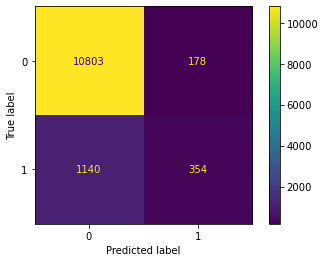

In [641]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
disp.plot()

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

### RandomForestClassifier

In [642]:
models.append('RandomForestClassifier')
rand_clf = RandomForestClassifier(random_state=42)
start_time = time()
rand_clf.fit(X_train, y_train)
train_time.append(time() - start_time)
y_pred = rand_clf.predict(X_test)

In [643]:
# Scoring the model
train_score = rand_clf.score(X_train, y_train)
train_accuracy.append(train_score)
test_accuracy.append(rand_clf.score(X_test, y_test))
#accuracy scores
accuracy_score.append(metrics.accuracy_score(y_test, y_pred))
fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
AUC_score.append(metrics.auc(fpr, tpr))




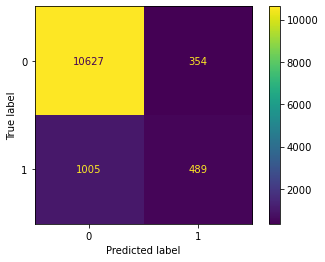

In [644]:
cm = metrics.confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### KNeighborsClassifier

In [645]:
models.append('KNeighborsClassifier')
knn = KNeighborsClassifier()
start_time = time()
knn.fit(X_train, y_train)
train_time.append(time() - start_time)
y_pred = knn.predict(X_test)



In [646]:
# Scoring the model
train_score = knn.score(X_train, y_train)
train_accuracy.append(train_score)
test_accuracy.append(knn.score(X_test, y_test))
#accuracy scores
accuracy_score.append(metrics.accuracy_score(y_test, y_pred))
fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
AUC_score.append(metrics.auc(fpr, tpr))

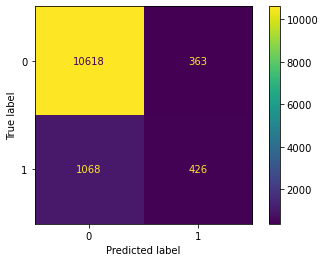

In [647]:
cm = metrics.confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### SVC

In [648]:
models.append('SVC')
svc = SVC()
start_time = time()
svc.fit(X_train, y_train)
train_time.append(time() - start_time)
y_pred = svc.predict(X_test)

In [649]:
# Scoring the model
train_score = svc.score(X_train, y_train)
train_accuracy.append(train_score)
test_accuracy.append(svc.score(X_test, y_test))
#accuracy scores
accuracy_score.append(metrics.accuracy_score(y_test, y_pred))
fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
AUC_score.append(metrics.auc(fpr, tpr))

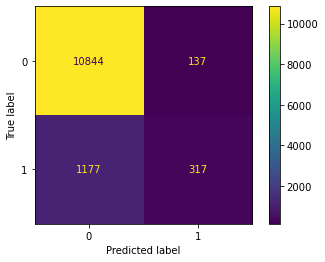

In [650]:
cm = metrics.confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [651]:
model_artifacts = pd.DataFrame({'Model':models, 
                                'Training_Time':train_time, 
                                'Training_Score': train_accuracy, 
                                'Test_Score':test_accuracy,
                                'Accuracy': accuracy_score,
                                'AUC': AUC_score})
model_artifacts

,Model,Training_Time,Training_Score,Test_Score,Accuracy,AUC
0,Baseline,0.002400,training_score,0.880240,N/A,N/A
1,Logistics Regression,0.175935,0.89711,0.894349,0.885291,0.626042
2,RandomForestClassifier,1.687056,0.994709,0.891062,0.891062,0.647536
3,KNeighborsClassifier,0.031605,0.909428,0.885291,0.885291,0.626042
4,SVC,22.065587,0.896162,0.894669,0.894669,0.599853


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

<b>Logistics Regression models training, test, AUC scores better than other models. Optimizing Logistics Regression models to improve further.</b>

In [652]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
log_reg = LogisticRegression()
lgr_cv=GridSearchCV(lgr, grid, cv=10)
lgr_cv.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(random_state=41, solver='liblinear'),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [653]:
lgr_cv.best_params_

{'C': 0.1, 'penalty': 'l1'}

In [654]:
#Adjust Performance Metrics
lgr2=LogisticRegression(C=0.1, penalty="l2", solver='liblinear') 
start_time = time()
lgr2.fit(X_train,y_train)
train_time = time() - start_time

In [655]:
y_pred = lgr2.predict(X_test)

In [656]:
cm = metrics.confusion_matrix(y_test, y_pred)

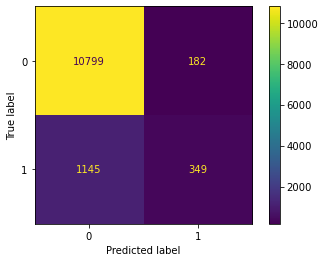

In [657]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [658]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
print('Precision    : %.3f'%precision_score(y_test, y_pred))
print('Recall       : %.3f'%recall_score(y_test, y_pred))
print('F1 Score     : %.3f'%f1_score(y_test, y_pred))

Precision    : 0.657
Recall       : 0.234
F1 Score     : 0.345


##### Questions